# <p style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Heart_disease project</p>


<img src ="https://healthmatters.nyp.org/wp-content/uploads/2020/01/heart-health-tips-article-animation-1200x500.gif">

<a id="2"></a>
# <p style="padding:10px;background-color:SkyBlue;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:100">Import Packages</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
import bz2
import pickle

In [2]:
data = pd.read_csv("D:\healthcare\Heart_disease_cleveland_new.csv")

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


In [4]:
data.shape

(303, 14)

In [5]:
data.target.value_counts()

0    164
1    139
Name: target, dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
sex,303.0,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
cp,303.0,2.158416,0.960126,0.0,2.0,2.0,3.0,3.0
trestbps,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
thalach,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


Text(0.5, 1.0, 'Correlation between features')

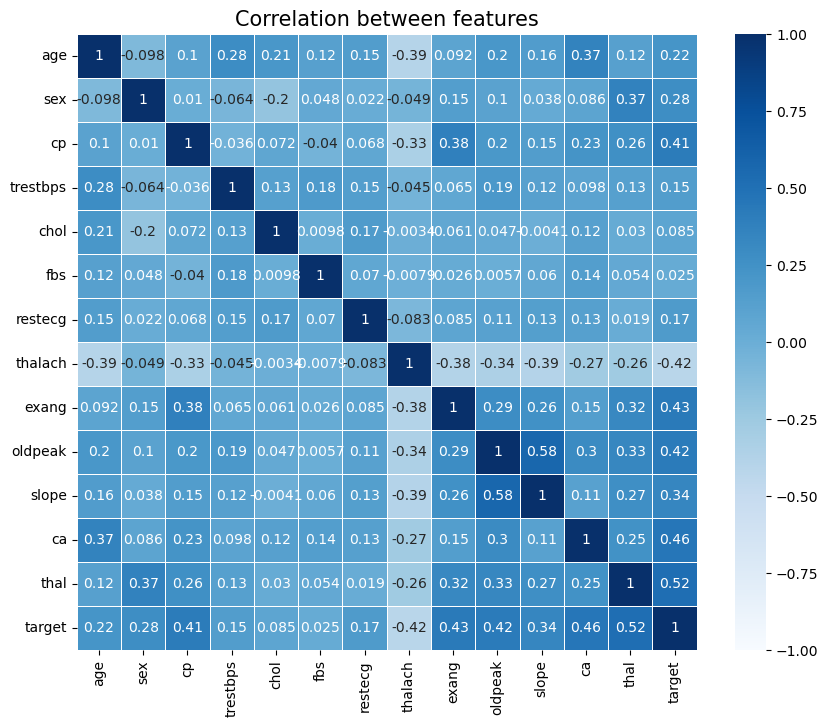

In [9]:
plt.figure(figsize= (10,8))
sns.heatmap(data.corr(),
            annot = True,
            vmin = -1,
            vmax = 1,
            linewidths=0.5,
            cmap = "Blues")
plt.title("Correlation between features", fontsize = 15)

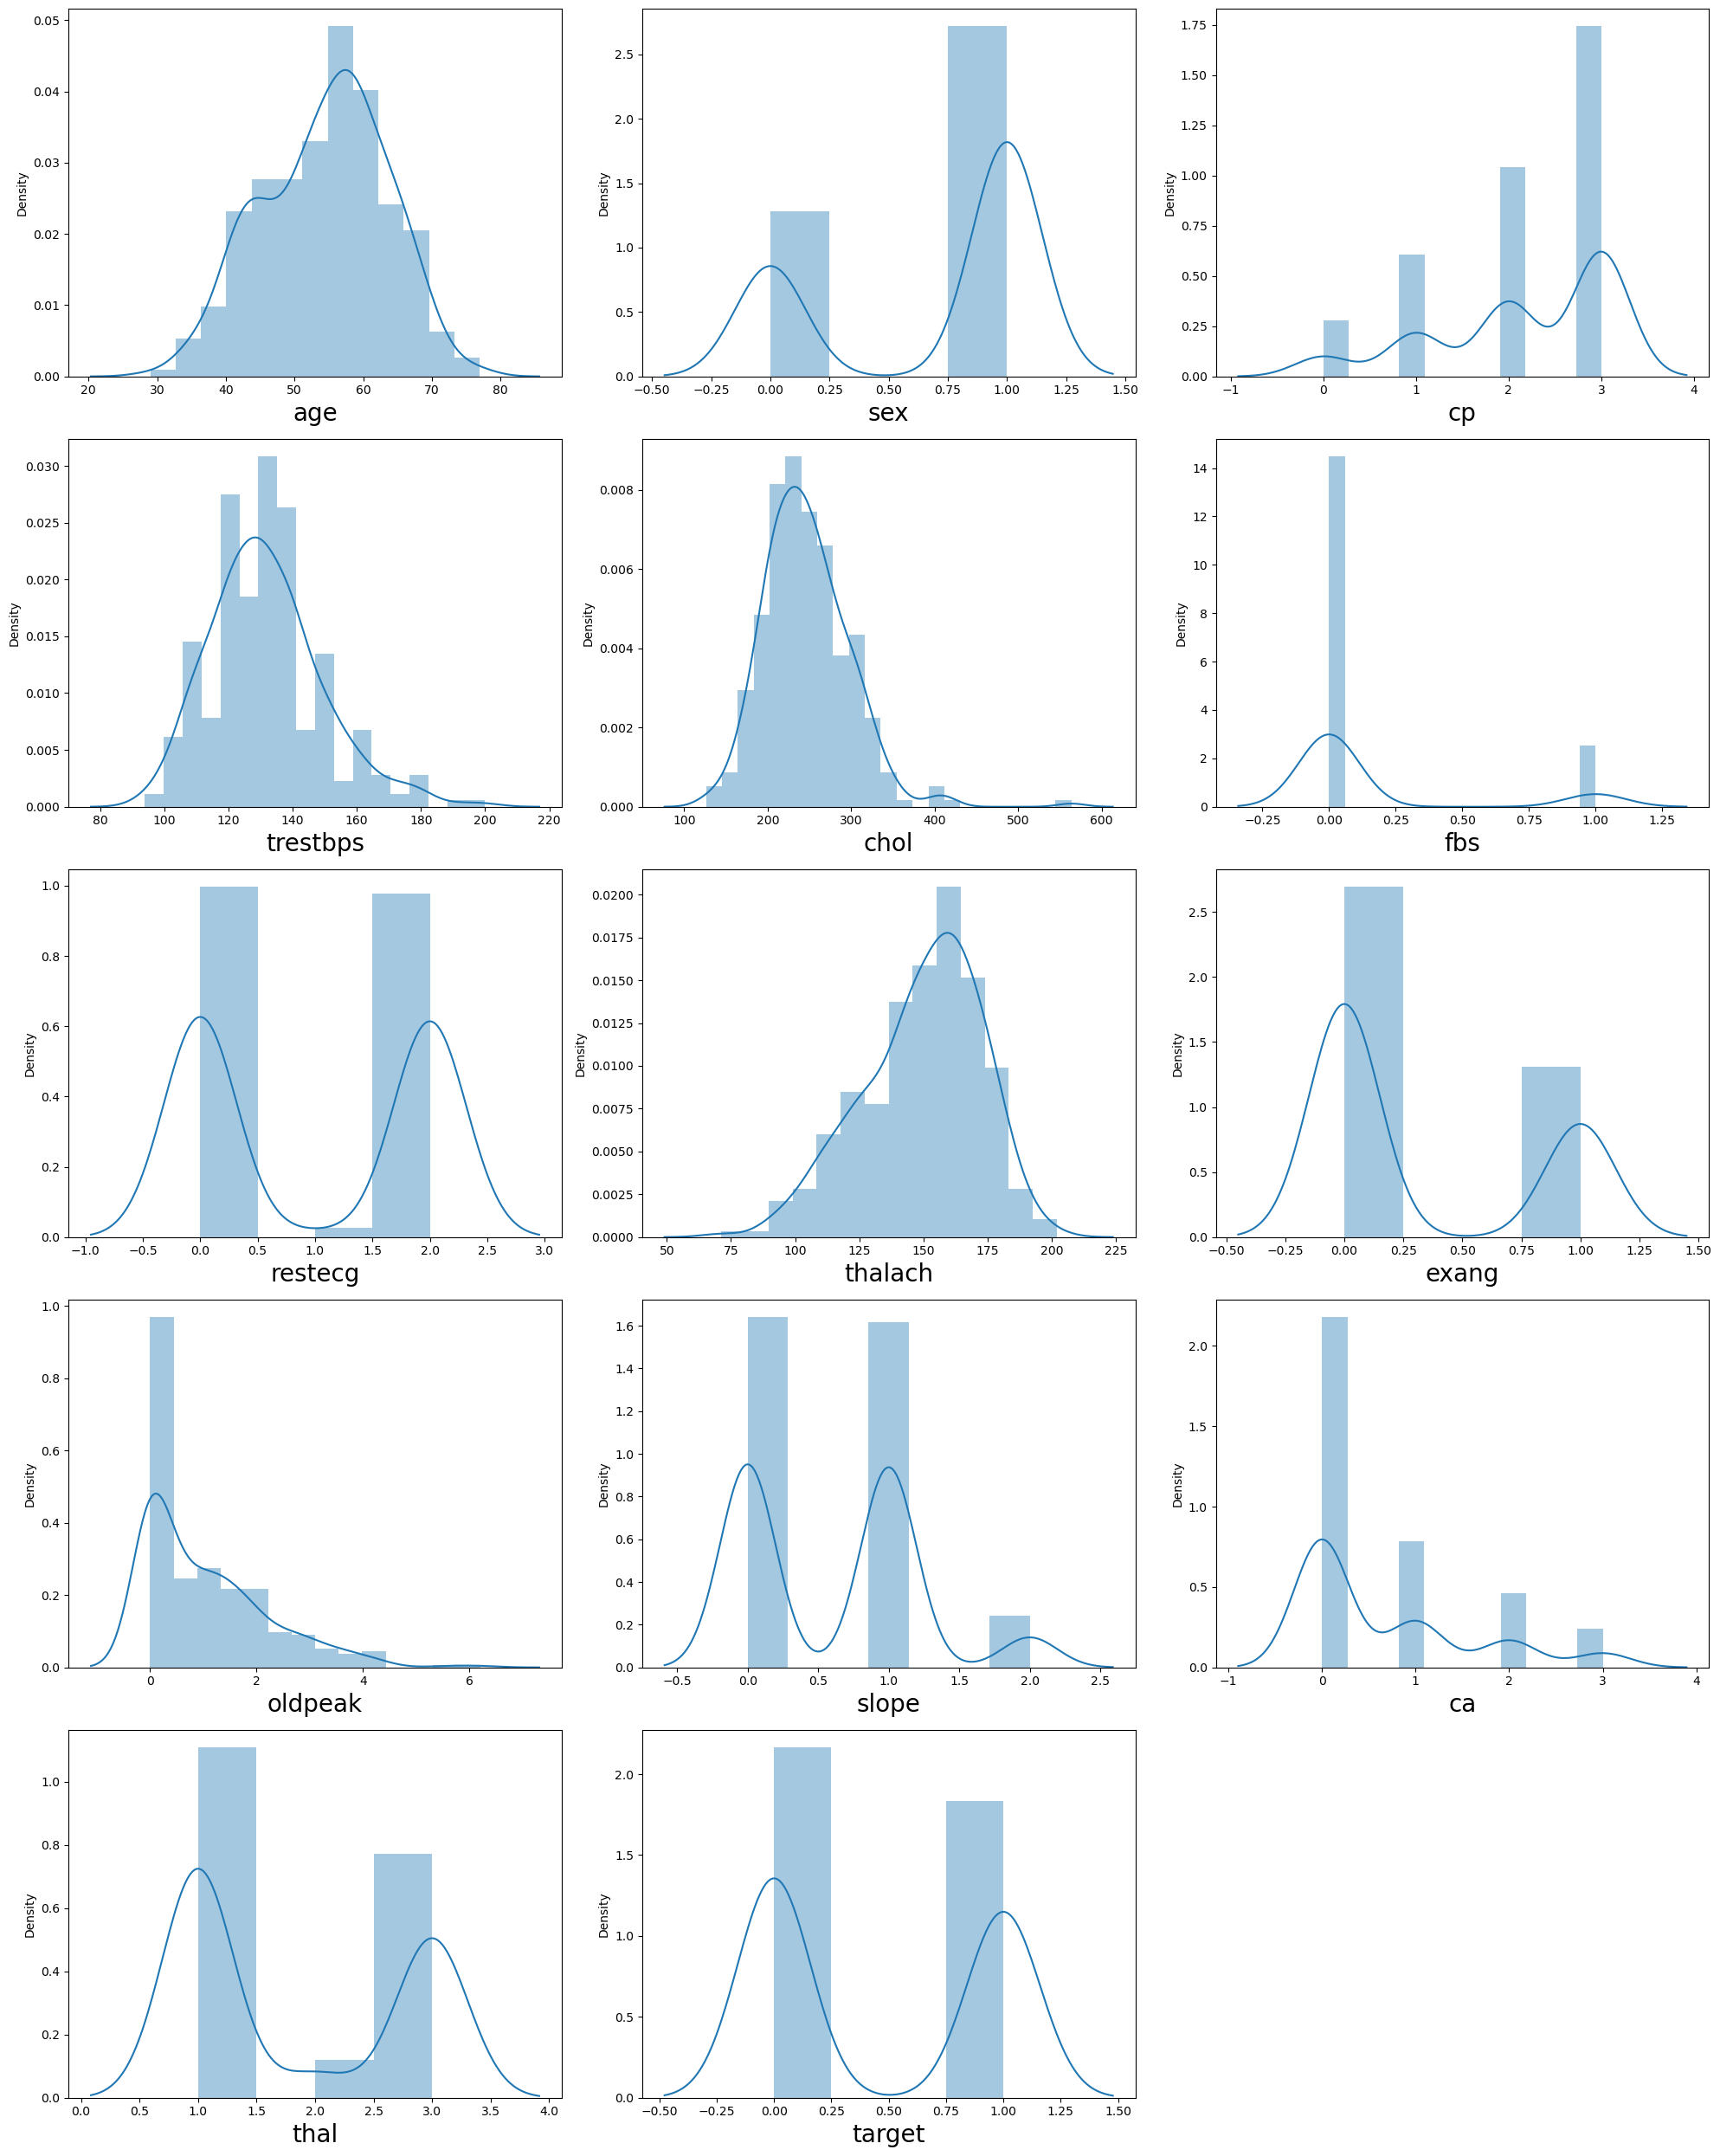

In [10]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25))
plotnumber = 1

for column in data:
    if plotnumber<= 14:
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

<AxesSubplot:>

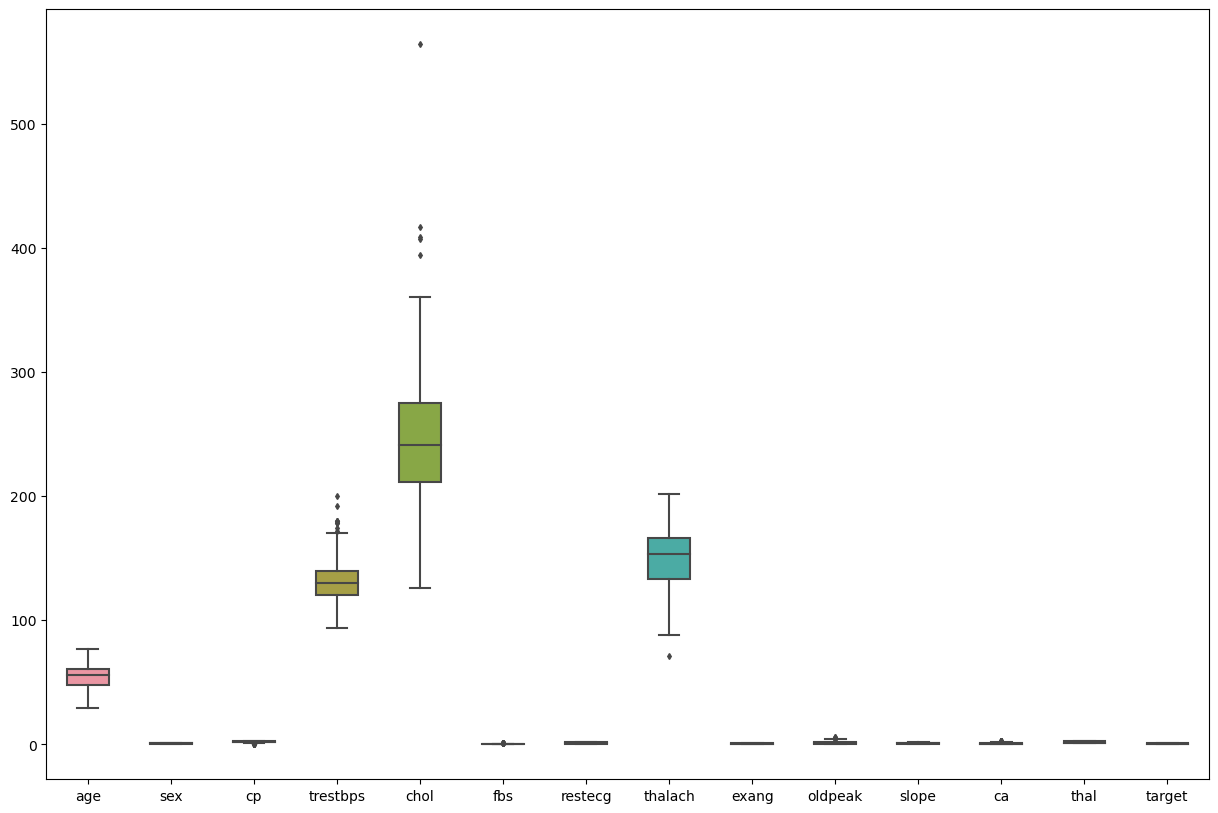

In [11]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)

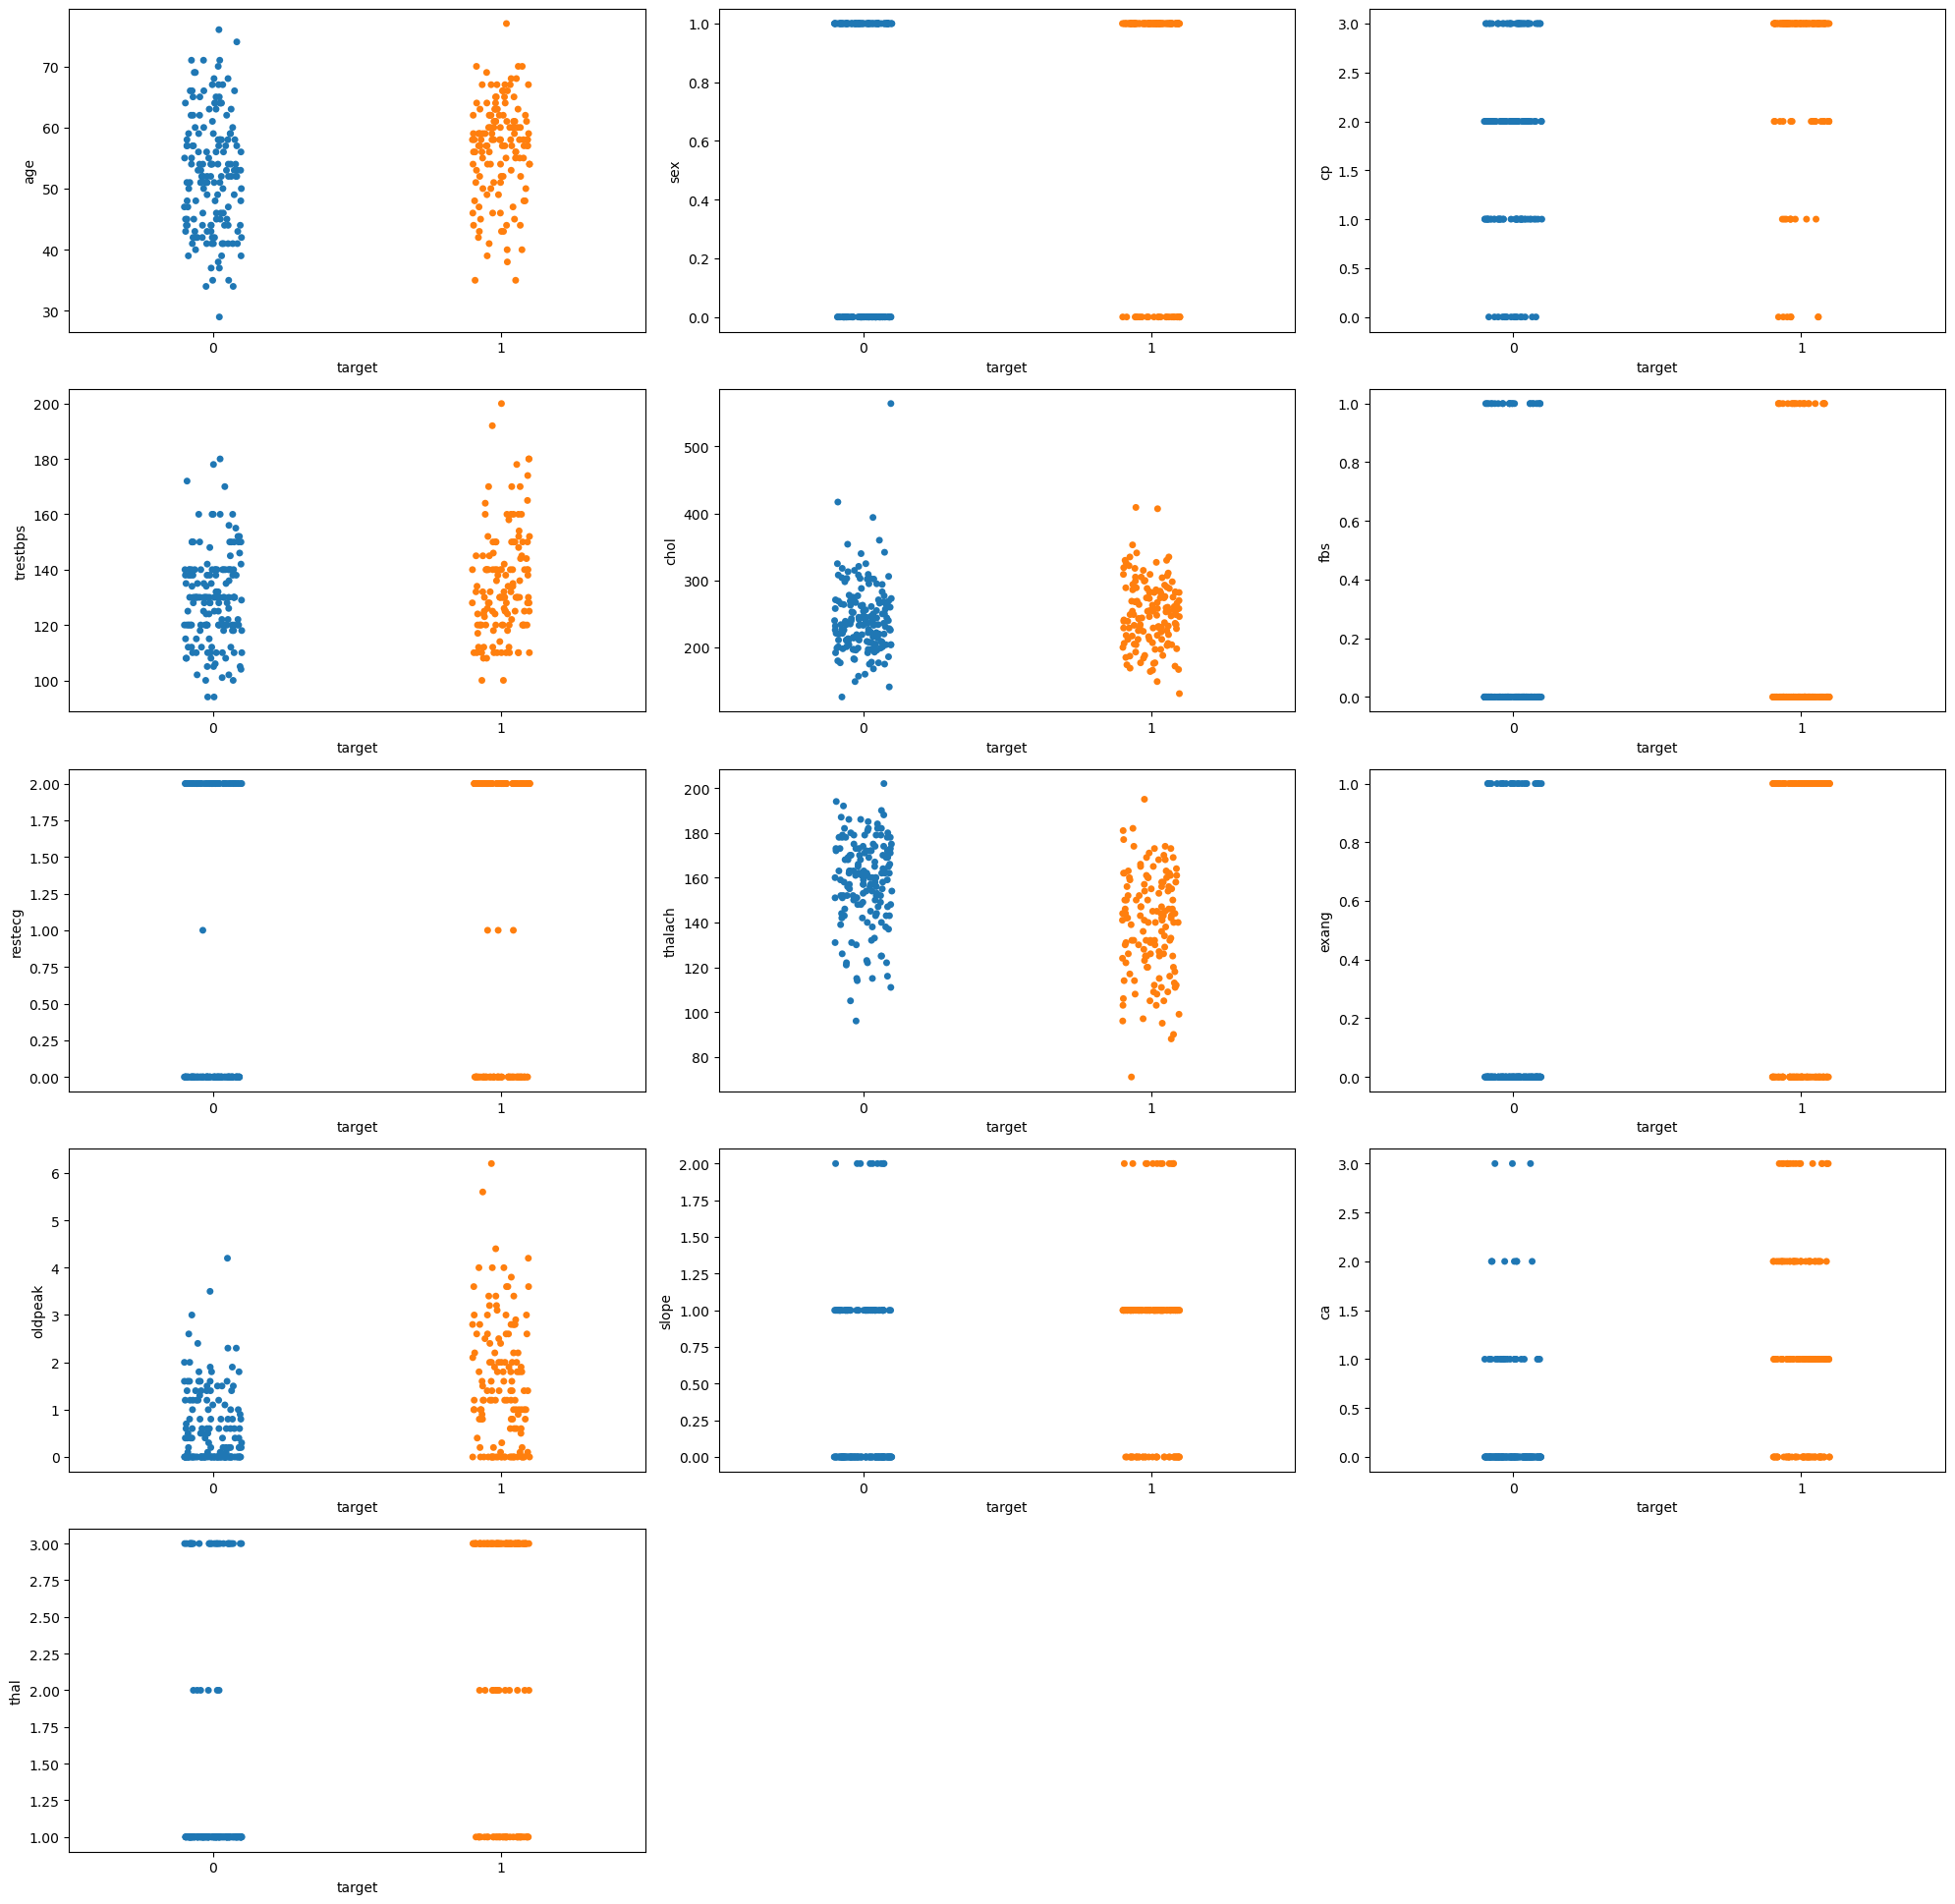

In [12]:
plt.figure( figsize=(20,50))
column_list =['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal'] 
for i, col in enumerate(column_list):
    plt.subplot(13,3,i+1)
    sns.stripplot(y=col, x='target', data=data  )

plt.tight_layout()

In [13]:
x = data.iloc[ : , :-1]
y = data.iloc[ : , -1]

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
# separate dataset into train and test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape, x_test.shape

((242, 13), (61, 13))

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [18]:
#saving the model
file = bz2.BZ2File('D:\healthcare/standardScalar.pkl','wb')
pickle.dump(scaler,file)
file.close()

In [19]:
scaler.mean_

array([5.48057851e+01, 6.57024793e-01, 2.09090909e+00, 1.32289256e+02,
       2.45619835e+02, 1.36363636e-01, 9.91735537e-01, 1.50099174e+02,
       3.38842975e-01, 1.03553719e+00, 5.95041322e-01, 6.40495868e-01,
       1.80578512e+00])

In [20]:
x_train_scaled= pd.DataFrame(x_train_scaled , columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled , columns=x_test.columns)

In [21]:
np.round(x_train_scaled.describe())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,242.0,242.0,242.0,242.0,242.0,242.0,242.0,242.0,242.0,242.0,242.0,242.0,242.0
mean,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-3.0,-1.0,-2.0,-2.0,-2.0,-0.0,-1.0,-4.0,-1.0,-1.0,-1.0,-1.0,-1.0
25%,-1.0,-1.0,-1.0,-1.0,-1.0,-0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
50%,0.0,1.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-1.0,-0.0,1.0,-1.0,-1.0
75%,1.0,1.0,1.0,0.0,1.0,-0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
max,2.0,1.0,1.0,4.0,4.0,3.0,1.0,2.0,1.0,4.0,2.0,3.0,1.0


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 

from sklearn.metrics import accuracy_score , precision_score,recall_score,f1_score , roc_auc_score,roc_curve

**linear**

In [23]:
logreg = LogisticRegression()
logreg.fit(x_train_scaled , y_train)

LogisticRegression()

In [24]:
lr_pred  = logreg.predict(x_test_scaled)

In [25]:
LR_Accuracy = accuracy_score(y_test, lr_pred)
print("Accuracy: " + str(LR_Accuracy))
print("-----------------------------------------")
LR_Precision = precision_score(y_test, lr_pred)
print("precision_score: " + str(LR_Precision))
print("-----------------------------------------")
LR_Recall = recall_score(y_test, lr_pred)
print("recall_score: " + str(LR_Recall))
print("-----------------------------------------")
LR_F1 = f1_score(y_test, lr_pred)
print("f1_score: " + str(LR_F1))
print("-----------------------------------------")
LR_Roc = roc_auc_score(y_test, lr_pred)
print("roc_auc_scory: " + str(LR_Roc))

Accuracy: 0.8852459016393442
-----------------------------------------
precision_score: 0.8787878787878788
-----------------------------------------
recall_score: 0.90625
-----------------------------------------
f1_score: 0.8923076923076922
-----------------------------------------
roc_auc_scory: 0.8841594827586207


**RandomForestClassifier**

In [26]:
rfc = RandomForestClassifier()
rfc.fit(x_train_scaled , y_train)

RandomForestClassifier()

In [27]:
rfc_pred  = rfc.predict(x_test_scaled)

In [28]:
RFC_Accuracy = accuracy_score(y_test, rfc_pred)
print("Accuracy: " + str(RFC_Accuracy))
print("-----------------------------------------")
RFC_Precision = precision_score(y_test, rfc_pred)
print("precision_score: " + str(RFC_Precision))
print("-----------------------------------------")
RFC_Recall = recall_score(y_test, rfc_pred)
print("recall_score: " + str(RFC_Recall))
print("-----------------------------------------")
RFC_F1 = f1_score(y_test, rfc_pred)
print("f1_score: " + str(RFC_F1))
print("-----------------------------------------")
RFC_Roc = roc_auc_score(y_test, rfc_pred)
print("roc_auc_scory: " + str(RFC_Roc))

Accuracy: 0.8852459016393442
-----------------------------------------
precision_score: 0.9310344827586207
-----------------------------------------
recall_score: 0.84375
-----------------------------------------
f1_score: 0.8852459016393444
-----------------------------------------
roc_auc_scory: 0.8873922413793103


**K-Nearest Neighbors Classifier**

In [29]:
knn =KNeighborsClassifier()
knn.fit(x_train_scaled , y_train)

KNeighborsClassifier()

In [30]:
knn_pred = knn.predict(x_test_scaled)

In [31]:
KNN_Accuracy = accuracy_score(y_test, knn_pred)
print("Accuracy: " + str(KNN_Accuracy))
print("-----------------------------------------")
KNN_Precision = precision_score(y_test, knn_pred)
print("precision_score: " + str(KNN_Precision))
print("-----------------------------------------")
KNN_Recall = recall_score(y_test, knn_pred)
print("recall_score: " + str(KNN_Recall))
print("-----------------------------------------")
KNN_F1 = f1_score(y_test, knn_pred)
print("f1_score: " + str(KNN_F1))
print("-----------------------------------------")
KNN_Roc = roc_auc_score(y_test, knn_pred)
print("roc_auc_scory: " + str(KNN_Roc))

Accuracy: 0.9180327868852459
-----------------------------------------
precision_score: 0.9354838709677419
-----------------------------------------
recall_score: 0.90625
-----------------------------------------
f1_score: 0.9206349206349206
-----------------------------------------
roc_auc_scory: 0.9186422413793103


**DecisionTreeClassifier**

In [32]:
dt = DecisionTreeClassifier()
dt.fit(x_train_scaled , y_train)

DecisionTreeClassifier()

In [33]:
dt_pred = dt.predict(x_test_scaled)

In [34]:
DT_Accuracy = accuracy_score(y_test, dt_pred)
print("Accuracy: " + str(DT_Accuracy))
print("-----------------------------------------")
DT_Precision = precision_score(y_test, dt_pred)
print("precision_score: " + str(DT_Precision))
print("-----------------------------------------")
DT_Recall = recall_score(y_test, dt_pred)
print("recall_score: " + str(DT_Recall))
print("-----------------------------------------")
DT_F1 = f1_score(y_test, dt_pred)
print("f1_score: " + str(DT_F1))
print("-----------------------------------------")
DT_Roc = roc_auc_score(y_test, dt_pred)
print("roc_auc_scory: " + str(DT_Roc))

Accuracy: 0.7540983606557377
-----------------------------------------
precision_score: 0.7931034482758621
-----------------------------------------
recall_score: 0.71875
-----------------------------------------
f1_score: 0.7540983606557378
-----------------------------------------
roc_auc_scory: 0.755926724137931


**Support Vector Machine**

In [35]:
sv = SVC()
sv.fit(x_train_scaled , y_train)

SVC()

In [36]:
sv_pred = sv.predict(x_test_scaled)

In [37]:
SV_Accuracy = accuracy_score(y_test, sv_pred)
print("Accuracy: " + str(SV_Accuracy))
print("-----------------------------------------")
SV_Precision = precision_score(y_test, sv_pred)
print("precision_score: " + str(SV_Precision))
print("-----------------------------------------")
SV_Recall = recall_score(y_test, sv_pred)
print("recall_score: " + str(SV_Recall))
print("-----------------------------------------")
SV_F1 = f1_score(y_test, sv_pred)
print("f1_score: " + str(SV_F1))
print("-----------------------------------------")
SV_Roc = roc_auc_score(y_test, sv_pred)
print("roc_auc_scory: " + str(SV_Roc))

Accuracy: 0.9016393442622951
-----------------------------------------
precision_score: 0.9333333333333333
-----------------------------------------
recall_score: 0.875
-----------------------------------------
f1_score: 0.9032258064516129
-----------------------------------------
roc_auc_scory: 0.9030172413793103


In [38]:
model_performance_accuracy = pd.DataFrame({'Model': ['LogisticRegression', 'RandomForestClassifier',  'KNeighborsClassifier',
                                                      'DecisionTreeClassifier',  'SVC' ],
                                        'Accuracy': [LR_Accuracy,RFC_Accuracy, KNN_Accuracy,DT_Accuracy, SV_Accuracy  ]})

model_performance_Precision = pd.DataFrame({'Model': ['LogisticRegression', 'RandomForestClassifier',  'KNeighborsClassifier',
                                                      'DecisionTreeClassifier',  'SVC' ],
                                        'precision_score': [LR_Precision,RFC_Precision, KNN_Precision,DT_Precision, 
                                                            SV_Precision  ]})                                                      
 
model_performance_Recall = pd.DataFrame({'Model': ['LogisticRegression', 'RandomForestClassifier',  'KNeighborsClassifier',
                                                      'DecisionTreeClassifier',  'SVC' ],
                                        'recall_score': [LR_Recall,RFC_Recall, KNN_Recall,DT_Recall, SV_Recall ]})                                                      
                                                   

model_performance_f1_score = pd.DataFrame({'Model': ['LogisticRegression', 'RandomForestClassifier',  'KNeighborsClassifier',
                                                      'DecisionTreeClassifier',  'SVC' ],
                                        'f1_score': [LR_F1,RFC_F1, KNN_F1,DT_F1,SV_F1 ]})   
                                                         
model_performance_roc_auc_score = pd.DataFrame({'Model': ['LogisticRegression','RandomForestClassifier',
                                                 'KNeighborsClassifier','DecisionTreeClassifier','SVC' ],
                                     'Roc': [LR_Roc,RFC_Roc, KNN_Roc, DT_Roc,  SV_Roc]})                                           

In [39]:
model_performance_accuracy.sort_values(by = "Accuracy", ascending = False)

,Model,Accuracy
2,KNeighborsClassifier,0.918033
4,SVC,0.901639
0,LogisticRegression,0.885246
1,RandomForestClassifier,0.885246
3,DecisionTreeClassifier,0.754098


In [40]:
model_performance_Precision.sort_values(by = "precision_score", ascending = False)

,Model,precision_score
2,KNeighborsClassifier,0.935484
4,SVC,0.933333
1,RandomForestClassifier,0.931034
0,LogisticRegression,0.878788
3,DecisionTreeClassifier,0.793103


In [41]:
model_performance_Recall.sort_values(by = "recall_score", ascending = False)

,Model,recall_score
0,LogisticRegression,0.90625
2,KNeighborsClassifier,0.90625
4,SVC,0.87500
1,RandomForestClassifier,0.84375
3,DecisionTreeClassifier,0.71875


In [42]:
model_performance_f1_score.sort_values(by = "f1_score", ascending = False)

,Model,f1_score
2,KNeighborsClassifier,0.920635
4,SVC,0.903226
0,LogisticRegression,0.892308
1,RandomForestClassifier,0.885246
3,DecisionTreeClassifier,0.754098


In [43]:
model_performance_roc_auc_score.sort_values(by = "Roc", ascending = False)

,Model,Roc
2,KNeighborsClassifier,0.918642
4,SVC,0.903017
1,RandomForestClassifier,0.887392
0,LogisticRegression,0.884159
3,DecisionTreeClassifier,0.755927


In [44]:
file = bz2.BZ2File('D:\healthcare/modelForPrediction.pkl','wb')
pickle.dump(logreg,file)
file.close()